<a href="https://colab.research.google.com/github/ishitabakshi/DS1002/blob/main/Ishita_copy_of_Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [22]:
import pandas as pd
data = pd.read_csv('/content/ftx-2021-01-01--2023-12-31.csv') # loads the CSV file into the data frame "data"

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [23]:
num_rows, num_columns = data.shape # counts how many rows and columns are in the raw data set
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)
data.info() # used this to get more information on the dataset

Number of rows: 741
Number of columns: 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 1 columns):
 #   Column                                                                              Non-Null Count  Dtype 
---  ------                                                                              --------------  ----- 
 0   timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp  741 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [32]:
#data.head(10) # print this to visualze the raw dataset prior to cleaning
# In this we can see that the colums are are concatenated within a single column seperates by a semicolon that have to be split

# make a copy of the data before modifying it
clean_data = data.copy()
# splits the data into real columns
clean_data[['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp']] = clean_data['timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp'].str.split(';', expand=True)
#print(clean_data.columns) # this was used to see the titles of all the columns, so selected ones can be properly dropped

# dropping specified columns from the datafram
columns_to_drop = ['timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp', 'timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap']
clean_data = clean_data.drop(columns=columns_to_drop)

# counts how many duplicated rows there are
clean_data.duplicated().sum()
print('The number of duplicate rows are ' + (str(data.duplicated().sum())) + '.')
clean_data = clean_data.drop_duplicates() # removes duplicate rows
print('The number of duplicate rows are now ' + (str(clean_data.duplicated().sum())) + '.')

# counts how many missing values there are in each column of the cleaned data
missing_values = clean_data.isna().sum()
print('The number of missing values in each column are:')
print(missing_values)

# coverts the date in the 'timestamp' column to the data type datetime
clean_data['timestamp'] = clean_data['timestamp'].str.strip('"') # removes the double quotation marks from the timestamp
clean_data['timestamp'] = pd.to_datetime(clean_data['timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ') # the "format= code was added because pandas could not recognixe the datetime format of the timestamp string
# removes the time from the end of the timestamp values because they are the same for each row
clean_data['timestamp'] = clean_data['timestamp'].dt.date
# sorts the data by the 'timestemp' column
clean_data = clean_data.sort_values(by='timestamp')


The number of duplicate rows are 14.
The number of duplicate rows are now 0.
The number of missing values in each column are:
open         0
high         0
low          0
close        0
volume       0
timestamp    0
dtype: int64


Now display the first 10 rows of the cleaned dataset.

In [33]:
clean_data.head(10)

,open,high,low,close,volume,timestamp
739,6.20113267,7.00752345,6.171834,6.92396831,31046652.87,2021-01-03
738,6.94867983,7.63214646,6.35821845,7.51407925,40526109.15,2021-01-04
737,7.52821638,8.71494656,7.08112034,8.66468773,49479278.39,2021-01-05
736,8.67128533,9.39079731,8.4259458,9.39079731,31404627.93,2021-01-06
735,9.386493,10.00487172,9.21524402,9.56213089,46303336.73,2021-01-07
734,9.56923877,9.72642922,8.45226488,9.38098835,42286267.89,2021-01-08
733,9.37044999,9.63612025,8.72804429,9.57051061,28498948.68,2021-01-09
732,9.57191738,9.94479719,8.6571467,9.30880934,31012393.14,2021-01-10
731,9.2983155,9.2983155,7.12604974,8.61099653,101302369.57,2021-01-11
730,8.6151428,9.09747943,8.04091578,8.38113312,26745357.03,2021-01-12


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [34]:
# determines the data type of the close column
clean_data['close'].dtype # shows column type as integers
# converts the close column to a numeric data type
clean_data['close'] = pd.to_numeric(clean_data['close'])
# calculates the difference between consecutive values in the 'close' column and assigns the new value to the column "close_change"
clean_data['close_change'] = clean_data['close'].diff()
clean_data.head(10)

,open,high,low,close,volume,timestamp,close_change
739,6.20113267,7.00752345,6.171834,6.923968,31046652.87,2021-01-03,NaN
738,6.94867983,7.63214646,6.35821845,7.514079,40526109.15,2021-01-04,0.590111
737,7.52821638,8.71494656,7.08112034,8.664688,49479278.39,2021-01-05,1.150608
736,8.67128533,9.39079731,8.4259458,9.390797,31404627.93,2021-01-06,0.726110
735,9.386493,10.00487172,9.21524402,9.562131,46303336.73,2021-01-07,0.171334
734,9.56923877,9.72642922,8.45226488,9.380988,42286267.89,2021-01-08,-0.181143
733,9.37044999,9.63612025,8.72804429,9.570511,28498948.68,2021-01-09,0.189522
732,9.57191738,9.94479719,8.6571467,9.308809,31012393.14,2021-01-10,-0.261701
731,9.2983155,9.2983155,7.12604974,8.610997,101302369.57,2021-01-11,-0.697813
730,8.6151428,9.09747943,8.04091578,8.381133,26745357.03,2021-01-12,-0.229863


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [ ]:
# sorts the dataframe by 'close_change' in descending order
sorted_growth = clean_data.sort_values(by='close_change', ascending=False)
# creates a table with the time stamp and change of the top 10 rows
pos_growth_table = sorted_growth.loc[:, ['timestamp', 'close_change']].head(10)
print('Top 10 days of positive growth for FTX:')
print(pos_growth_table)

Top 10 days of positive growth for FTX:
      timestamp  close_change
492  2021-09-01     16.677156
487  2021-09-06      9.800320
692  2021-02-19      8.335900
592  2021-05-24      6.333923
673  2021-03-09      5.529699
515  2021-08-09      5.325192
485  2021-09-08      5.239728
625  2021-04-26      4.504385
611  2021-05-05      4.488174
311  2022-02-28      4.401841


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [35]:
# creates a new column of the percent change between successive rows
clean_data['rate_of_change'] = clean_data['close_change'].pct_change()
clean_data.head(10)


,open,high,low,close,volume,timestamp,close_change,rate_of_change
739,6.20113267,7.00752345,6.171834,6.923968,31046652.87,2021-01-03,NaN,NaN
738,6.94867983,7.63214646,6.35821845,7.514079,40526109.15,2021-01-04,0.590111,NaN
737,7.52821638,8.71494656,7.08112034,8.664688,49479278.39,2021-01-05,1.150608,0.949817
736,8.67128533,9.39079731,8.4259458,9.390797,31404627.93,2021-01-06,0.726110,-0.368934
735,9.386493,10.00487172,9.21524402,9.562131,46303336.73,2021-01-07,0.171334,-0.764039
734,9.56923877,9.72642922,8.45226488,9.380988,42286267.89,2021-01-08,-0.181143,-2.057251
733,9.37044999,9.63612025,8.72804429,9.570511,28498948.68,2021-01-09,0.189522,-2.046260
732,9.57191738,9.94479719,8.6571467,9.308809,31012393.14,2021-01-10,-0.261701,-2.380847
731,9.2983155,9.2983155,7.12604974,8.610997,101302369.57,2021-01-11,-0.697813,1.666448
730,8.6151428,9.09747943,8.04091578,8.381133,26745357.03,2021-01-12,-0.229863,-0.670594


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [36]:
# Sorts the data based on the rate_of_change column from greatest to least value
sorted_change1 = clean_data.sort_values(by='rate_of_change', ascending=False)
# Creates a new table with just the time stamp and rate of changeof the top 5 rows
top_5_pos_change = sorted_change1.loc[:, ['timestamp', 'rate_of_change']].head(5)
print('Top 5 days of greatest positive rate change:')
print(top_5_pos_change)

# Sorts the data based on the rate_of_change column from least to greatest value
sorted_change2 = clean_data.sort_values(by='rate_of_change', ascending=True)
# Creates a new table with just the time stamp and rate of changeof the top 5 rows
top_5_neg_change = sorted_change2.loc[:, ['timestamp', 'rate_of_change']].head(5)
print('Top 5 days of greatest negative rate change:')
print(top_5_neg_change)

Top 5 days of greatest positive rate change:
      timestamp  rate_of_change
372  2021-12-28      612.326740
55   2022-11-08      129.835551
236  2022-05-13      117.908853
308  2022-03-03       92.537644
513  2021-08-11       65.569141
Top 5 days of greatest negative rate change:
      timestamp  rate_of_change
443  2021-10-18     -262.744729
190  2022-06-28     -164.238246
107  2022-09-17     -111.945189
132  2022-08-23      -84.342694
179  2022-07-09      -50.514692


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

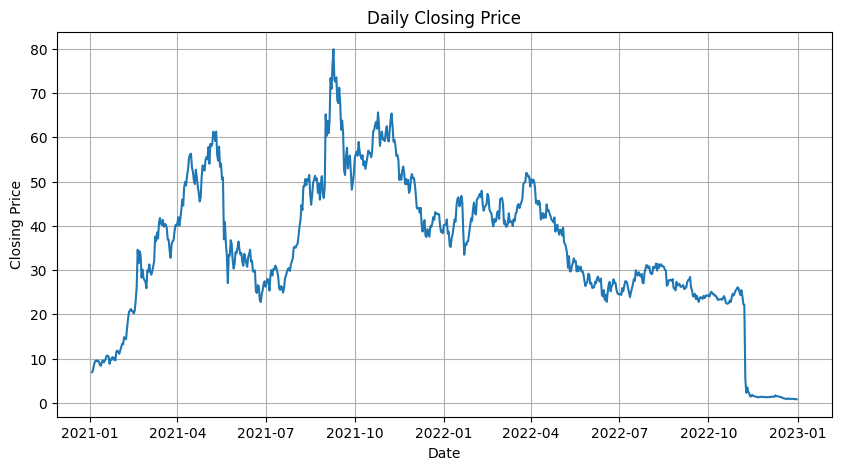

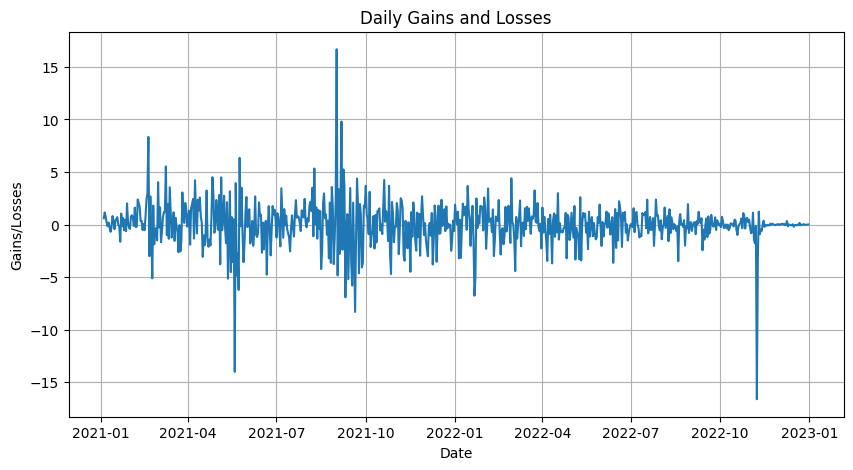

In [38]:
import matplotlib.pyplot as plt

# Creates a plot for the daily closing point
plt.figure(figsize=(10, 5))
plt.plot(clean_data['timestamp'], clean_data['close'])
# Creates a title and axis lables
plt.title('Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
# Displays the plot
plt.show()

# Creates a plot for the daily gains and losses
plt.figure(figsize=(10, 5))
plt.plot(clean_data['timestamp'], clean_data['close_change'])
# Creates a title and axis lables
plt.title('Daily Gains and Losses')
plt.xlabel('Date')
plt.ylabel('Gains/Losses')
plt.grid(True)
# Displays the plot
plt.show()

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

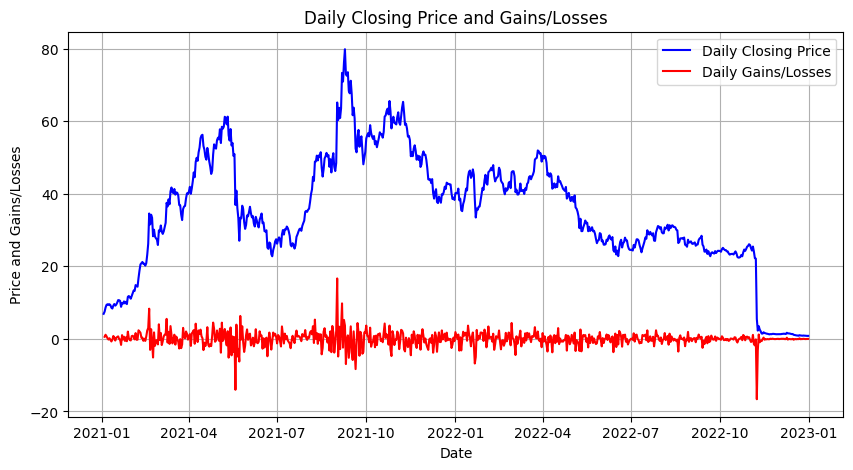

In [40]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,5))
# Plot daily closing price
ax.plot(clean_data['timestamp'], clean_data['close'], color='blue', label='Daily Closing Price')
# Plot daily gains and losses
ax.plot(clean_data['timestamp'], clean_data['close_change'], color='red', label='Daily Gains/Losses')

# Create lables and title
ax.set_title('Daily Closing Price and Gains/Losses')
ax.set_xlabel('Date')
ax.set_ylabel('Price and Gains/Losses')

# Show legend
ax.legend()

# Show grid
ax.grid(True)

# Show the plot
plt.show()